# Test of Piecewise Smooth Quadratic Estimators

In [26]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from interval import *
import psl_bounds_cy as pl
import psqe_bounds_cy as pq
from matplotlib import rc

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
# for Palatino and other serif fonts use:
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)


Auxiliary plot routine

In [27]:
def plot_problem(flist, min_list, a, b):
    colors = ['r-', 'b-', 'g-', 'y-', 'm-', 'c-']
    step = (b - a) / 1000.
    ta = np.arange(a, b + step, step)
    num_points = len(ta)
    num_funcs = len(flist)

    fta = np.empty([num_funcs, num_points])
    print(fta)

    for i in range(num_funcs):
        for j in range(num_points):
            fta[i, j] = flist[i](ta[j])
    lb = np.amin(fta)
    ub = np.amax(fta)
    d = (ub - lb) * 0.1
    for i in range(num_funcs):
        plt.plot(ta, fta[i, :], colors[i])
    # for point in min_list:
    #     plt.scatter(point[0], point[1], s=20)

    plt.ylim([lb - d, ub + d])
    plt.axhline(y=0, linestyle='--', color='black')
    plt.text(0, 2, r'$\Phi(x)$', fontsize=18)
    plt.text(0.6, 0.6, r'$\overline{x}$', fontsize=18)

    plt.text(0.5, -2, r'$f(x)$', fontsize=18)
    plt.text(-0.2, 0.1, r'$x^*$', fontsize=18)

    plt.text(0.15, -6, r'$\phi(x)$', fontsize=18)
    plt.text(-0.5, -1, r'$ \underline{x}$', fontsize=18)

    plt.scatter(0.62, 0, s=28)
    plt.scatter(-0.22, 0, s=28)
    plt.scatter(-0.31, 0, s=28)
    plt.savefig('./first_root.png', dpi=500)
    plt.show()

Test problem

In [28]:
x = sym.symbols('x')
e_f = x**3-x+x**2
# e_f=-x**3-x**2+4.8
# e_f=-(1./(7.26231 * (10. * x - 1.34364)**2 + 0.25275) + 1./(3.96356 * (10. * x - 2.55069)**2 + 0.1899) + 1./(6.64323 * (10. * x - 6.51593)**2 + 0.11877) + 1./(7.13707 * (10. * x - 0.28347)**2 + 0.18655) + 1./(1.00844 * (10. * x - 7.6228)**2 + 0.18908) + 1./(2.12438 * (10. * x - 7.2154)**2 + 0.28905) + 1./(1.1261 * (10. * x - 9.01427)**2 + 0.10509) + 1./(8.2846 * (10. * x - 5.41412)**2 + 0.17624) + 1./(3.4012 * (10. * x - 2.16599)**2 + 0.10581) + 1./(3.51853 * (10. * x - 2.21692)**2 + 0.19916)-15.5)
# e_f = x ** 3 + 2 * x - 10 + sin(10 * x)
# e_f=-x**3.0+3.0*x**2-2.0*x-7.0*sin(5.0*x)

In [29]:
# x = sym.symbols('x')
# e_f = x ** 3 + 2 * x ** 2 - 4 * x-1+sin(x)
e_nf = -e_f
e_df = sym.diff(e_f)
e_ndf = -e_df
e_ddf = sym.diff(e_df)
e_nddf = -e_ddf
print(e_f, e_df, e_ddf)
module_sin = {"sin": sin}
module_cos = {"cos": cos}
f = sym.lambdify(x, e_f, modules=[module_sin, module_cos])
# print('f', f(-1.))
# print('f', f(2.))

nf = sym.lambdify(x, e_nf)
df = sym.lambdify(x, e_df, modules=[module_sin, module_cos])
ndf = sym.lambdify(x, e_ndf)
ddf = sym.lambdify(x, e_ddf, modules=[module_sin, module_cos])
nddf = sym.lambdify(x, e_nddf)
# a = -1.
# b = 2.
a=-1.5
b=1.5
idef = Interval([a, b])
print(f(a))
print(f(b))
di = df(idef)

# print(f(idef), df(idef), ddf(idef))
ddi = ddf(idef)
print(di, ddi)

x**3 + x**2 - x 3*x**2 + 2*x - 1 6*x + 2
0.375
4.125
[-4.0, 8.75] [-7.0, 11.0]


In [30]:

# estim = pq.PSQE_Under(a, b, ddi.x[0], ddi.x[1], f, df)
l = max(-di.x[0], di.x[1])
L = max(-ddi.x[0], ddi.x[1])
# print(L)
# estim_pl = pl.PSL_Bounds(a, b, di.x[0], di.x[1], f, True)
# estim_plip = pl.PSL_Bounds(a, b, -l, l, f, True)
# estim_pl_ob = pl.PSL_Bounds(a, b, di.x[0], di.x[1], f, False)

estim_int = pq.PSQE_Bounds(a, b, ddi.x[0], ddi.x[1], f(a), f(b), df(a), df(b), True)
# estim_lip = pq.PSQE_Bounds(a, b, -L, L, f(a),f(b), df(a),df(b), True)
estim_int_ob = pq.PSQE_Bounds(a, b, ddi.x[0], ddi.x[1], f(a), f(b), df(a), df(b), False)

# print(estim_pl)
# print(estim_plip)
print(estim_int)
# print(estim_lip)
print(estim_int_ob)
# min_list = [estim_int.lower_bound_and_point(),
#             estim_int_ob.lower_bound_and_point()]
# print(min_list)

Estimator a = -1.5, b = 1.5, c = -0.25, d = 1.25, alp = -7.0, bet = 11.0, fa = 0.375, fb = 4.125, dfa = 2.75, dfb = 8.75
Estimator a = -1.5, b = 1.5, c = -1.25, d = 0.25, alp = -11.0, bet = 7.0, fa = -0.375, fb = -4.125, dfa = -2.75, dfb = -8.75


Vizualize test problem

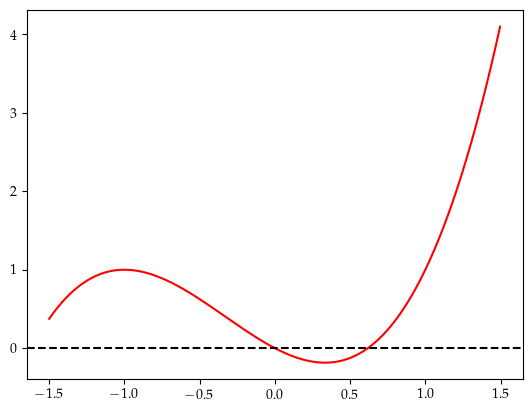

In [16]:
colors = ['r-', 'b-', 'g-', 'y-', 'm-', 'c-']
step = (b - a) / 1000.
ta = np.arange(a, b , step)
num_points = len(ta)
flist1 = []
flist2 = []
le = a
re = b
num_funcs = 1
fta1 = np.empty([num_funcs, num_points])
fta2 = np.empty([num_funcs, num_points])
fta = np.empty( num_points)
for i in range(0, num_funcs):
    ole = le
    ore = re
    # estim_int = pq.PSQE_Bounds(le, re, ddi.x[0], ddi.x[1], f(le), f(re), df(le), df(re), True)
    # 
    # if f(re)<0:
    #     estim_int_ob = pq.PSQE_Bounds(le, re, ddi.x[0], ddi.x[1], f(le), f(re), df(le), df(re), False)
    #     re = estim_int_ob.get_right_end()
    # else:
    #     re=estim_int.get_right_end2()
    # le = estim_int.get_left_end()
    # print(ole,ore)
    # f1=estim_int.estimator
    # f2=estim_int_ob.nestimator
    # print(f1(a),f2(a))
    # print(estim_int)
    # flist1.append(estim_int.estimator)
    # flist2.append(estim_int_ob.nestimator)
    # for j in range(num_points):
    #     if ole <= ta[j] <= ore:
    #         fta1[i, j] = f1(ta[j])
    #         fta2[i, j] = f2(ta[j])
    #     else:
    #         fta1[i,j]=None
    #         fta2[i,j]=None
lb = np.amin(fta1[0])
ub = np.amax(fta2[0])
d = (ub - lb) * 0.1
for j in range(num_points):
    fta[j] = f(ta[j])
plt.plot(ta, fta, 'r-')

# for i in range(num_funcs):
#     plt.plot(ta, fta1[i, :], 'b-')
    # plt.plot(ta, fta2[i, :], 'g-')

# plt.ylim([lb - d, ub + d])
plt.axhline(y=0, linestyle='--', color='black')
plt.savefig('./certain.png', dpi=500)
plt.show()

-1.5 1.5
0.375 0.375
Estimator a = -1.5, b = 1.5, c = -1.25, d = 0.25, alp = -11.0, bet = 7.0, fa = -0.375, fb = -4.125, dfa = -2.75, dfb = -8.75


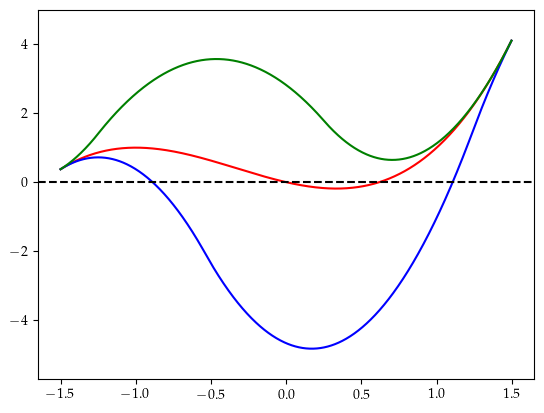

In [18]:
colors = ['r-', 'b-', 'g-', 'y-', 'm-', 'c-']
step = (b - a) / 1000.
ta = np.arange(a, b , step)
num_points = len(ta)
flist1 = []
flist2 = []
le = a
re = b
num_funcs = 1
fta1 = np.empty([num_funcs, num_points])
fta2 = np.empty([num_funcs, num_points])
fta = np.empty( num_points)
for i in range(0, num_funcs):
    ole = le
    ore = re
    estim_int = pq.PSQE_Bounds(le, re, ddi.x[0], ddi.x[1], f(le), f(re), df(le), df(re), True)

    if f(re)<0:
        estim_int_ob = pq.PSQE_Bounds(le, re, ddi.x[0], ddi.x[1], f(le), f(re), df(le), df(re), False)
        re = estim_int_ob.get_right_end()
    else:
        re=estim_int.get_right_end2()
    le = estim_int.get_left_end()
    print(ole,ore)
    f1=estim_int.estimator
    f2=estim_int_ob.nestimator
    print(f1(a),f2(a))
    print(estim_int_ob)
    # flist1.append(estim_int.estimator)
    # flist2.append(estim_int_ob.nestimator)
    for j in range(num_points):
        if ole <= ta[j] <= ore:
            fta1[i, j] = f1(ta[j])
            fta2[i, j] = f2(ta[j])
        else:
            fta1[i,j]=None
            fta2[i,j]=None
lb = np.amin(fta1[0])
ub = np.amax(fta2[0])
d = (ub - lb) * 0.1
for j in range(num_points):
    fta[j] = f(ta[j])
plt.plot(ta, fta, 'r-')

for i in range(num_funcs):
    plt.plot(ta, fta1[i, :], 'b-')
    plt.plot(ta, fta2[i, :], 'g-')

plt.ylim([lb - d, ub + d])
plt.axhline(y=0, linestyle='--', color='black')
plt.savefig('./lip_pyj.png', dpi=500)
plt.show()


-1.5 1.5
0.375 0.375
Piecewise linear estimator a = -1.5, b = 1.5, c = 0.21428571428571427, alp = -8.75, bet = 8.75, fa = -0.375, fb = -4.125


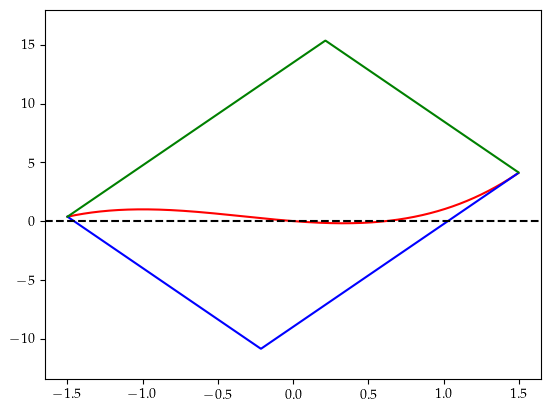

In [25]:
colors = ['r-', 'b-', 'g-', 'y-', 'm-', 'c-']
step = (b - a) / 1000.
ta = np.arange(a, b , step)
num_points = len(ta)
flist1 = []
flist2 = []
le = a
re = b
num_funcs = 1
fta1 = np.empty([num_funcs, num_points])
fta2 = np.empty([num_funcs, num_points])
fta = np.empty( num_points)
for i in range(0, num_funcs):
    ole = le
    ore = re
    estim_int=pl.PSL_Bounds(le, re,di.x[0],di.x[1], f(le), f(re), True)
    # estim_int = pl.PSQE_Bounds(le, re, ddi.x[0], ddi.x[1], f(le), f(re), df(le), df(re), True)
    estim_int_ob = pl.PSL_Bounds(le, re, di.x[0], di.x[1], f(le), f(re), False)
    if f(re)<0:
        
        # estim_int_ob = pq.PSQE_Bounds(le, re, ddi.x[0], ddi.x[1], f(le), f(re), df(le), df(re), False)
        re = estim_int_ob.get_right_end()
    else:
        re=estim_int.get_right_end2()
    le = estim_int.get_left_end()
    print(ole,ore)
    f1=estim_int.estimator
    f2=estim_int_ob.nestimator
    print(f1(a),f2(a))
    print(estim_int_ob)
    # flist1.append(estim_int.estimator)
    # flist2.append(estim_int_ob.nestimator)
    for j in range(num_points):
        if ole <= ta[j] <= ore:
            fta1[i, j] = f1(ta[j])
            fta2[i, j] = f2(ta[j])
        else:
            fta1[i,j]=None
            fta2[i,j]=None
lb = np.amin(fta1[0])
ub = np.amax(fta2[0])
d = (ub - lb) * 0.1
for j in range(num_points):
    fta[j] = f(ta[j])
plt.plot(ta, fta, 'r-')

for i in range(num_funcs):
    plt.plot(ta, fta1[i, :], 'b-')
    plt.plot(ta, fta2[i, :], 'g-')

plt.ylim([lb - d, ub + d])
plt.axhline(y=0, linestyle='--', color='black')
plt.savefig('./piy_const.png', dpi=500)
plt.show()

-1.5 1.5
0.375 0.375
Piecewise linear estimator a = -1.5, b = 1.5, c = -0.2647058823529412, alp = -8.75, bet = 4.0, fa = -0.375, fb = -4.125
-1.5 1.5
0.375 0.375
Piecewise linear estimator a = -1.5, b = 1.5, c = 0.21428571428571427, alp = -8.75, bet = 8.75, fa = -0.375, fb = -4.125


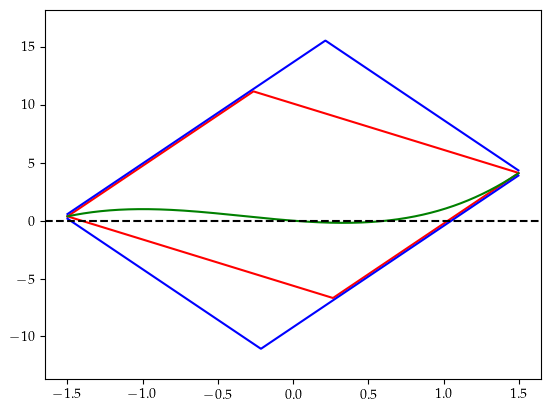

In [49]:
colors = ['r-', 'b-', 'g-', 'y-', 'm-', 'c-']
step = (b - a) / 1000.
ta = np.arange(a, b , step)
num_points = len(ta)
flist1 = []
flist2 = []
le = a
re = b
num_funcs = 1
fta1 = np.empty([num_funcs, num_points])
fta2 = np.empty([num_funcs, num_points])
fta = np.empty( num_points)
for i in range(0, num_funcs):
    ole = le
    ore = re
    estim_int=pl.PSL_Bounds(le, re,di.x[0],di.x[1], f(le), f(re), True)
    # estim_int = pl.PSQE_Bounds(le, re, ddi.x[0], ddi.x[1], f(le), f(re), df(le), df(re), True)
    estim_int_ob = pl.PSL_Bounds(le, re, di.x[0], di.x[1], f(le), f(re), False)
    if f(re)<0:
        
        # estim_int_ob = pq.PSQE_Bounds(le, re, ddi.x[0], ddi.x[1], f(le), f(re), df(le), df(re), False)
        re = estim_int_ob.get_right_end()
    else:
        re=estim_int.get_right_end2()
    le = estim_int.get_left_end()
    print(ole,ore)
    f1=estim_int.estimator
    f2=estim_int_ob.nestimator
    print(f1(a),f2(a))
    print(estim_int_ob)
    # flist1.append(estim_int.estimator)
    # flist2.append(estim_int_ob.nestimator)
    for j in range(num_points):
        if ole <= ta[j] <= ore:
            fta1[i, j] = f1(ta[j])
            fta2[i, j] = f2(ta[j])
        else:
            fta1[i,j]=None
            fta2[i,j]=None
lb = np.amin(fta1[0])
ub = np.amax(fta2[0])
d = (ub - lb) * 0.1

for i in range(num_funcs):
    plt.plot(ta, fta1[i, :], 'r-')
    plt.plot(ta, fta2[i, :], 'r-')

num_points = len(ta)
flist1 = []
flist2 = []
le = a
re = b
num_funcs = 1
fta1 = np.empty([num_funcs, num_points])
fta2 = np.empty([num_funcs, num_points])
fta = np.empty( num_points)
for i in range(0, num_funcs):
    ole = le
    ore = re
    estim_int=pl.PSL_Bounds(le, re,-l,l, f(le), f(re), True)
    # estim_int = pl.PSQE_Bounds(le, re, ddi.x[0], ddi.x[1], f(le), f(re), df(le), df(re), True)
    estim_int_ob = pl.PSL_Bounds(le, re, -l, l, f(le), f(re), False)
    if f(re)<0:
        
        # estim_int_ob = pq.PSQE_Bounds(le, re, ddi.x[0], ddi.x[1], f(le), f(re), df(le), df(re), False)
        re = estim_int_ob.get_right_end()
    else:
        re=estim_int.get_right_end2()
    le = estim_int.get_left_end()
    print(ole,ore)
    f1=estim_int.estimator
    f2=estim_int_ob.nestimator
    print(f1(a),f2(a))
    print(estim_int_ob)
    # flist1.append(estim_int.estimator)
    # flist2.append(estim_int_ob.nestimator)
    for j in range(num_points):
        if ole <= ta[j] <= ore:
            fta1[i, j] = f1(ta[j])-0.2
            fta2[i, j] = f2(ta[j])+0.2
        else:
            fta1[i,j]=None
            fta2[i,j]=None
lb = np.amin(fta1[0])
ub = np.amax(fta2[0])
d = (ub - lb) * 0.1
for j in range(num_points):
    fta[j] = f(ta[j])
plt.plot(ta, fta, 'g-')

for i in range(num_funcs):
    plt.plot(ta, fta1[i, :], 'b-')
    plt.plot(ta, fta2[i, :], 'b-')

plt.ylim([lb - d, ub + d])
plt.axhline(y=0, linestyle='--', color='black')
plt.savefig('./piy_mix.png', dpi=500)
plt.show()

-1.5 1.5
0.375 0.375
Estimator a = -1.5, b = 1.5, c = -1.25, d = 0.25, alp = -11.0, bet = 7.0, fa = -0.375, fb = -4.125, dfa = -2.75, dfb = -8.75
-1.5 1.5
0.375 0.375
Estimator a = -1.5, b = 1.5, c = -1.1136363636363638, d = 0.11363636363636354, alp = -11.0, bet = 11.0, fa = -0.375, fb = -4.125, dfa = -2.75, dfb = -8.75


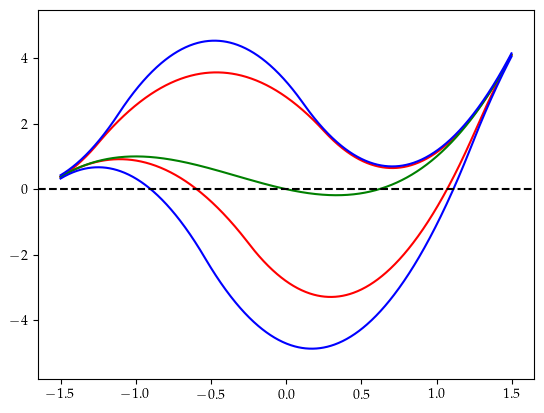

In [52]:
colors = ['r-', 'b-', 'g-', 'y-', 'm-', 'c-']
step = (b - a) / 1000.
ta = np.arange(a, b , step)
num_points = len(ta)
flist1 = []
flist2 = []
le = a
re = b
num_funcs = 1
fta1 = np.empty([num_funcs, num_points])
fta2 = np.empty([num_funcs, num_points])
fta = np.empty( num_points)
for i in range(0, num_funcs):
    ole = le
    ore = re
    estim_int = pq.PSQE_Bounds(le, re, ddi.x[0], ddi.x[1], f(le), f(re), df(le), df(re), True)
    estim_int_ob = pq.PSQE_Bounds(le, re, ddi.x[0], ddi.x[1], f(le), f(re), df(le), df(re), False)
    if f(re)<0:
        re = estim_int_ob.get_right_end()
    else:
        re=estim_int.get_right_end2()
    le = estim_int.get_left_end()
    print(ole,ore)
    f1=estim_int.estimator
    f2=estim_int_ob.nestimator
    print(f1(a),f2(a))
    print(estim_int_ob)
    # flist1.append(estim_int.estimator)
    # flist2.append(estim_int_ob.nestimator)
    for j in range(num_points):
        if ole <= ta[j] <= ore:
            fta1[i, j] = f1(ta[j])
            fta2[i, j] = f2(ta[j])
        else:
            fta1[i,j]=None
            fta2[i,j]=None
lb = np.amin(fta1[0])
ub = np.amax(fta2[0])
d = (ub - lb) * 0.1

for i in range(num_funcs):
    plt.plot(ta, fta1[i, :], 'r-')
    plt.plot(ta, fta2[i, :], 'r-')

flist1 = []
flist2 = []
le = a
re = b
num_funcs = 1
fta1 = np.empty([num_funcs, num_points])
fta2 = np.empty([num_funcs, num_points])
fta = np.empty( num_points)
for i in range(0, num_funcs):
    ole = le
    ore = re
    estim_int = pq.PSQE_Bounds(le, re, -L, L, f(le), f(re), df(le), df(re), True)
    estim_int_ob = pq.PSQE_Bounds(le, re, -L, L, f(le), f(re), df(le), df(re), False)
    if f(re)<0:
        re = estim_int_ob.get_right_end()
    else:
        re=estim_int.get_right_end2()
    le = estim_int.get_left_end()
    print(ole,ore)
    f1=estim_int.estimator
    f2=estim_int_ob.nestimator
    print(f1(a),f2(a))
    print(estim_int_ob)
    # flist1.append(estim_int.estimator)
    # flist2.append(estim_int_ob.nestimator)
    for j in range(num_points):
        if ole <= ta[j] <= ore:
            fta1[i, j] = f1(ta[j])-0.05
            fta2[i, j] = f2(ta[j])+0.05
        else:
            fta1[i,j]=None
            fta2[i,j]=None
lb = np.amin(fta1[0])
ub = np.amax(fta2[0])
d = (ub - lb) * 0.1
for j in range(num_points):
    fta[j] = f(ta[j])
plt.plot(ta, fta, 'g-')

for i in range(num_funcs):
    plt.plot(ta, fta1[i, :], 'b-')
    plt.plot(ta, fta2[i, :], 'b-')
    
plt.ylim([lb - d, ub + d])
plt.axhline(y=0, linestyle='--', color='black')
plt.savefig('./quad_mix.png', dpi=500)
plt.show()

-1.5 1.5
0.375 0.375
Estimator a = -1.5, b = 1.5, c = -0.25, d = 1.25, alp = -7.0, bet = 11.0, fa = 0.375, fb = 4.125, dfa = 2.75, dfb = 8.75
-1.5 1.5
0.375 0.375
Piecewise linear estimator a = -1.5, b = 1.5, c = 0.2647058823529412, alp = -4.0, bet = 8.75, fa = 0.375, fb = 4.125


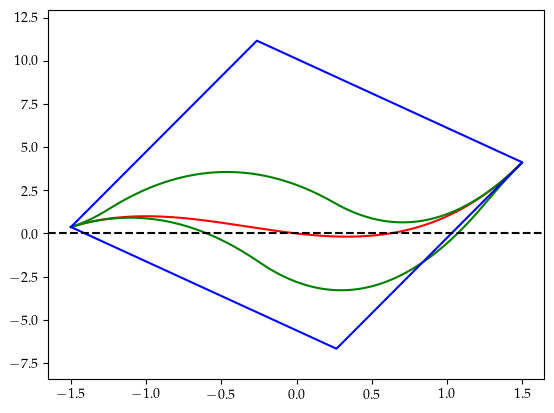

In [58]:
colors = ['r-', 'b-', 'g-', 'y-', 'm-', 'c-']
step = (b - a) / 1000.
ta = np.arange(a, b , step)
num_points = len(ta)
flist1 = []
flist2 = []
le = a
re = b
num_funcs = 1
fta1 = np.empty([num_funcs, num_points])
fta2 = np.empty([num_funcs, num_points])
fta = np.empty( num_points)
for i in range(0, num_funcs):
    ole = le
    ore = re
    estim_int = pq.PSQE_Bounds(le, re, ddi.x[0], ddi.x[1], f(le), f(re), df(le), df(re), True)
    estim_int_ob = pq.PSQE_Bounds(le, re, ddi.x[0], ddi.x[1], f(le), f(re), df(le), df(re), False)
    if f(re)<0:
        re = estim_int_ob.get_right_end()
    else:
        re=estim_int.get_right_end2()
    le = estim_int.get_left_end()
    print(ole,ore)
    f1=estim_int.estimator
    f2=estim_int_ob.nestimator
    print(f1(a),f2(a))
    print(estim_int)
    # flist1.append(estim_int.estimator)
    # flist2.append(estim_int_ob.nestimator)
    for j in range(num_points):
        if ole <= ta[j] <= ore:
            fta1[i, j] = f1(ta[j])
            fta2[i, j] = f2(ta[j])
        else:
            fta1[i,j]=None
            fta2[i,j]=None
lb = np.amin(fta1[0])
ub = np.amax(fta2[0])
d = (ub - lb) * 0.1
for j in range(num_points):
    fta[j] = f(ta[j])
plt.plot(ta, fta, 'r-')

for i in range(num_funcs):
    plt.plot(ta, fta1[i, :], 'g-')
    plt.plot(ta, fta2[i, :], 'g-')

flist1 = []
flist2 = []
le = a
re = b
num_funcs = 1
fta1 = np.empty([num_funcs, num_points])
fta2 = np.empty([num_funcs, num_points])
fta = np.empty( num_points)
for i in range(0, num_funcs):
    ole = le
    ore = re
    estim_int=pl.PSL_Bounds(le, re,di.x[0],di.x[1], f(le), f(re), True)
    # estim_int = pl.PSQE_Bounds(le, re, ddi.x[0], ddi.x[1], f(le), f(re), df(le), df(re), True)
    estim_int_ob = pl.PSL_Bounds(le, re, di.x[0],di.x[1], f(le), f(re), False)
    if f(re)<0:
        re = estim_int_ob.get_right_end()
    else:
        re=estim_int.get_right_end2()
    le = estim_int.get_left_end()
    print(ole,ore)
    f1=estim_int.estimator
    f2=estim_int_ob.nestimator
    print(f1(a),f2(a))
    print(estim_int)
    # flist1.append(estim_int.estimator)
    # flist2.append(estim_int_ob.nestimator)
    for j in range(num_points):
        if ole <= ta[j] <= ore:
            fta1[i, j] = f1(ta[j])
            fta2[i, j] = f2(ta[j])
        else:
            fta1[i,j]=None
            fta2[i,j]=None
lb = np.amin(fta1[0])
ub = np.amax(fta2[0])
d = (ub - lb) * 0.1


for i in range(num_funcs):
    plt.plot(ta, fta1[i, :], 'b-')
    plt.plot(ta, fta2[i, :], 'b-')
    
plt.ylim([lb - d, ub + d])
plt.axhline(y=0, linestyle='--', color='black')
plt.savefig('./psl_psqe.png', dpi=500)
plt.show()